1.0 导入包

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_utils import load_dataset

1.1 Visualizing the dataset

train_X shape:  (12, 1)
train_y shape:  (12, 1)


Text(0, 0.5, 'Water flowing out of the dam (y)')

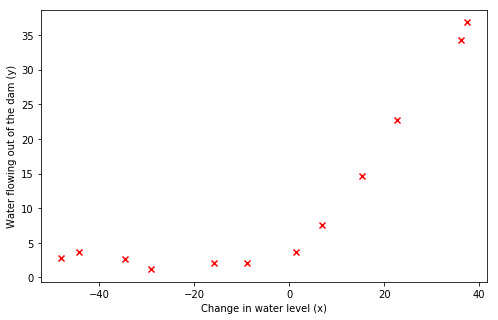

In [3]:
train_X, train_y, Xval, yval, Xtest, ytest = load_dataset()
print('train_X shape: ', train_X.shape)
print('train_y shape: ', train_y.shape)
plt.figure(figsize=(8, 5))
plt.scatter(train_X, train_y, c='r',marker='x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

1.2 Regularized linear regression cost function

In [10]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

tf.set_random_seed(1)  # so that your "random" numbers match ours

# Set model weights
W = tf.Variable(tf.random_normal((1,1)), name="weight")
b = tf.Variable(3.0, name="bias")
# Construct a linear model
pred = tf.add(tf.matmul(X, W), b)  # (12, 1)  (1, 1)  (12, 1)
print(pred)
# Y = WX + b

Tensor("Add_1:0", shape=(?, 1), dtype=float32)


In [23]:
m, n= train_X.shape
print(m, n)
cost = tf.reduce_sum(tf.square(pred - train_y))/ (2 * m)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

12 1


Cost after epoch 0: 154.552460
Cost after epoch 100: 63.028820
Cost after epoch 200: 55.859833
Cost after epoch 300: 49.954998
Cost after epoch 400: 45.091427
Cost after epoch 500: 41.085487


Cost after epoch 600: 37.785927
Cost after epoch 700: 35.068214
Cost after epoch 800: 32.829742
Cost after epoch 900: 30.985977


Cost after epoch 1000: 29.467346
Cost after epoch 1100: 28.216511
Cost after epoch 1200: 27.186245
Cost after epoch 1300: 26.337658
Cost after epoch 1400: 25.638700


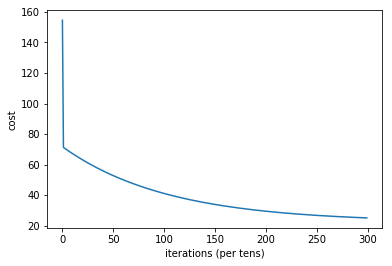

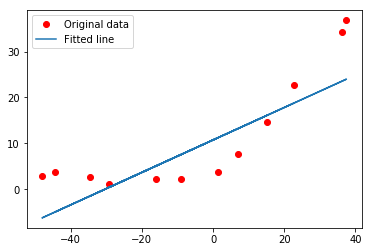

In [25]:
epochs = 1500
costs = []
with tf.Session() as sess:
    sess.run(init)
    # J = sess.run(cost, feed_dict={X: train_X, Y: train_y})
    # print(J)
    for epoch in range(epochs):
        _, epoch_cost = sess.run([optimizer, cost], feed_dict={X:train_X, Y:train_y})
        # Print the cost every epoch
        if epoch % 100 == 0:
            print("Cost after epoch %i: %f" % (epoch, epoch_cost))
        if epoch % 5 == 0:
            costs.append(epoch_cost)
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.show()

    plt.plot(train_X, train_y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

FailedPreconditionError: Attempting to use uninitialized value weight
	 [[{{node _retval_weight_0_0}}]]

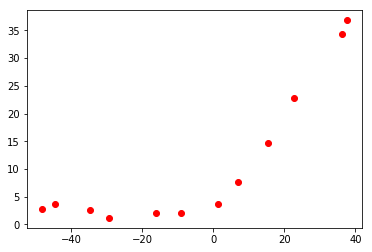

In [13]:
#  Fitting linear regression 拟合线性回归
with tf.Session() as sess:
    plt.plot(train_X, train_y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()